libraries

In [1]:
import pandas as pd
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
import time

# preproccess and preapare all datsets

This Function will be used to change string labels to numbers for calculations convenience.

In [2]:
# df is dataframe to convert labels
# label is the column conating class labels
# start_num defined to set the first number used instead of chararcters
def label_chng(df, label = 0, start_num = 2):
    df1 = df.copy()
    for i in df.columns:
        temp = (df[i].unique())
        for j in range(df.shape[0]):
            if i == label:
                try:
                    df1.at[j,i] = np.where(temp == df.at[j,i])[0][0]
                except IndexError:
                    df1.at[j,i] = df.at[j,i]
            else:
                try:
                    df1.at[j,i] = np.where(temp == df.at[j,i])[0][0] + start_num
                except IndexError:
                    df1.at[j,i] = df.at[j,i]
    return df1

# Mushroom Data Set

This dataset has missing values, since missing values is placed on one of the featrues and number of missing values around quarter of all datas, logical decision is to drop feature with missing values and use other features. classes include edible=e, poisonous=p that will be changed to one and zero. for recognising missing values, null valuse detector will be set to question mark(?) as in file.

In [3]:
df = pd.read_csv("data\\" + 'agaricus-lepiota.data', header=None, na_values='?')
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.info()
# data summary 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      5644 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df1 = label_chng(df)
X = np.array(df1.drop([0, 11], axis = 1))
Y  = np.array(df1[0])

#all dataset will be shuffled
temp = list(zip(X, Y))
np.random.shuffle(temp)
X_mushroom, Y_mushroom = zip(*temp)
# resault of shuffle is tuple nedd to take step backward
X_mushroom, Y_mushroom = np.array(X_mushroom), np.array(Y_mushroom)

# Breast Cancer

As there is not much missing value in thhis dataset, all features will be used but missing values( 16 items in one feature) will be droped. also in calss label column number 2 is for benign and 4 is for malignant breast cancer. ID coulmn will be droped as it's not useful in calssification progress.

In [6]:
df = pd.read_csv("data\\" + 'breast-cancer-wisconsin.data', header=None, na_values='?')
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [7]:
df.info()
# data summary 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       699 non-null    int64  
 1   1       699 non-null    int64  
 2   2       699 non-null    int64  
 3   3       699 non-null    int64  
 4   4       699 non-null    int64  
 5   5       699 non-null    int64  
 6   6       683 non-null    float64
 7   7       699 non-null    int64  
 8   8       699 non-null    int64  
 9   9       699 non-null    int64  
 10  10      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


,0,1,2,3,4,5,6,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
df1 = df.dropna()
X = np.array(df1.drop([0, 10], axis = 1)).astype(int)
Y  = np.array(df1[10])

#all dataset will be shuffled
temp = list(zip(X, Y))
np.random.shuffle(temp)
X_Bcncr, Y_Bcncr = zip(*temp)
# resault of shuffle is tuple nedd to take step backward
X_Bcncr, Y_Bcncr = np.array(X_Bcncr), np.array(Y_Bcncr)

# Cars
This dataset has no missing values, all attributes in dataset contain charactesritic value that should be chaged to number, last column in data include class labels which is for classes, lables will chnaged to numbers between zero to 4, zero meaning  unaacu and four equal to v-good. also data numbers is not different in scale so no data scalling teqchnique will be used.

In [9]:
df = pd.read_csv("data\\" + 'car.data', header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [10]:
# data info
df.info()
# data summary 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [11]:
df1 = label_chng(df, 6)
X = np.array(df1.drop([6], axis = 1))
Y  = np.array(df1[6])

#all dataset will be shuffled
temp = list(zip(X, Y))
np.random.shuffle(temp)
X_cars, Y_cars = zip(*temp)
# resault of shuffle is tuple nedd to take step backward
X_cars, Y_cars = np.array(X_cars), np.array(Y_cars)

# ecoli dataset
This data is not normal data like other and has some problem with delimiter of file, numpy load text module used to overcome this problem.dataset include name of each instance which is not useful and will be dropped. last column on dataset is labeled class which is string and only this column will be chnaged to number.

In [12]:
df = pd.DataFrame(np.loadtxt("data\\" + 'ecoli.data', dtype='str'))
df

,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.50,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.50,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.50,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.50,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.50,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.50,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.50,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.50,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.50,0.42,0.42,0.37,pp


In [13]:
# data info
df.info()
# data summary 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       336 non-null    object
 1   1       336 non-null    object
 2   2       336 non-null    object
 3   3       336 non-null    object
 4   4       336 non-null    object
 5   5       336 non-null    object
 6   6       336 non-null    object
 7   7       336 non-null    object
 8   8       336 non-null    object
dtypes: object(9)
memory usage: 23.8+ KB


,0,1,2,3,4,5,6,7,8
count,336,336,336,336,336,336,336,336,336
unique,336,78,63,2,2,59,82,77,8
top,AAT_ECOLI,0.63,0.51,0.48,0.50,0.42,0.35,0.39,cp
freq,1,17,16,326,335,15,11,13,143


In [14]:
X = np.array(df.drop([0, 8], axis = 1))
X = (X.astype(float) * 100).astype(int)
Y = np.array(df[8])
temp = (df[8].unique())
for i in range(len(df[8])):
        Y[i] = np.where(temp == df.at[i, 8])[0][0]

#all dataset will be shuffled
temp = list(zip(X, Y))
np.random.shuffle(temp)
X_ec, Y_ec = zip(*temp)
# resault of shuffle is tuple nedd to take step backward
X_ec, Y_ec = np.array(X_ec), np.array(Y_ec)

# letter recognition
This dataset has alphabet letter as class label and no missing value, only labels need to be chnaged to numbers.

Like all other datasets, there is no huge difference in datasets, so no nedd for data scalling.

In [15]:
df = pd.read_csv("data\\" + 'letter-recognition.data', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [16]:
# data info
df.info()
# data summary 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20000 non-null  object
 1   1       20000 non-null  int64 
 2   2       20000 non-null  int64 
 3   3       20000 non-null  int64 
 4   4       20000 non-null  int64 
 5   5       20000 non-null  int64 
 6   6       20000 non-null  int64 
 7   7       20000 non-null  int64 
 8   8       20000 non-null  int64 
 9   9       20000 non-null  int64 
 10  10      20000 non-null  int64 
 11  11      20000 non-null  int64 
 12  12      20000 non-null  int64 
 13  13      20000 non-null  int64 
 14  14      20000 non-null  int64 
 15  15      20000 non-null  int64 
 16  16      20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [17]:
X = np.array(df.drop([0], axis = 1))

Y = np.array(df[0])
temp = np.sort(df[0].unique())
for i in range(len(df[0])):
        Y[i] = np.where(temp == df.at[i, 0])[0][0]

#all dataset will be shuffled
temp = list(zip(X, Y))
np.random.shuffle(temp)
X_letter, Y_letter = zip(*temp)
# resault of shuffle is tuple nedd to take step backward
X_letter, Y_letter = np.array(X_letter), np.array(Y_letter)

Define classes and functions for (1) ID3; (2) Adaboost on Tree Stumps; (3) Random Forest; (4) Naïve Bayes; (5) K-nearest neighbors (kNN).

#  Iterative Dichotomiser 3 (ID3)

In [18]:
class ID3:
    def __init__(self):
        self.tree = {}
        self.label = []
    def cal_entropy(self, y):
        # Had to calculate the entropy in the whole dataset
        val, nums = np.unique(y, return_counts = True)
        trp = 0
        for i in range(len(val)):
            #for each class in the labels
            pr = nums[i] / len(y) # density of each class
            # subtract density in log2 density from entorpy
            trp -= pr * np.log2(pr)
        return trp

    def bilateral_info(self, x, y):
        # Calculate the mutual information gain of feature
        tpy = self.cal_entropy(y)
        # calculate entropy for classes
        x_vals, nums = np.unique(x, return_counts = True) #unqiue values of the feature
        px = nums / len(x)
        zipped = zip(px, x_vals)
        for i, v in zipped:
            # subtract gain info by entopry of where feature is equla to number of values in feature
            tpy -= i * self.cal_entropy(y[x == v])
        return tpy

    def fit(self, x, y, pair_vals = None, depth = 0, max_depth = 15):
        if pair_vals is None:
            # add unique features with index to array with vsatck
            pair_vals = np.vstack([[(i, v) for v in np.unique(x[:, i])] for i in range(x.shape[1])])
        y_class, y_counts = np.unique(y, return_counts=True)
        # get unique classes with number of occurance
        
        if len(y_class) == 1:
            #if class is one end function
            self.label.append(y_class[0])
            return y_class[0]
        if len(pair_vals) == 0 or depth == max_depth:
            # if there is no attribue pair values or no depth required end function tree
            self.label.append(y_class[np.argmax(y_counts)])
            return y_class[np.argmax(y_counts)]
        # calclte gain information for each unique feature
        
        bil_information = [self.bilateral_info(np.array(x[:, i] == v).astype(int), y) for (i, v) in pair_vals]
        bil_information = np.array(bil_information)

        (attr, val) = pair_vals[np.argmax(bil_information)]
        #selecting feature with highest information gain
        folders = {}
        for i in np.unique(np.array(x[:, attr] == val).astype(int)):
            folders.update({i: (np.array(x[:, attr] == val).astype(int) == i).nonzero()[0]})
        # partioning highest gain feature
        # delete from paried attribute with highest information gain
        pair_vals = np.delete(pair_vals, np.argwhere(np.all(pair_vals == (attr, val), axis = 1)), 0)

        for split_val, indices in folders.items():
            # seperate x and y which present in partions
            x_subset = x.take(indices, axis = 0)
            y_subset = y.take(indices, axis = 0)
            decision = bool(split_val)
            # get the decision if split value is not empty
            # recall function for calculationg rest of the tree
            self.tree[(attr, val, decision)] = self.fit(x_subset, y_subset, pair_vals = pair_vals,
                                                        depth = depth + 1, max_depth = max_depth)


    def prediction_id3(self, x, tree):
        for split_factor, sub_trees in tree.items():
            attr_index = split_factor[0]
            attr_val = split_factor[1]
            split_decision = split_factor[2]
            if np.any(split_decision == (x[attr_index] == attr_val)):
                # if decision is eqaul to both feature value and tree value
                if type(sub_trees) is dict:
                    label = self.prediction_id3(x, sub_trees)
                else:
                    label = sub_trees
                return label
        
    def predict(self, Xtst):
        return [self.prediction_id3(i, self.tree) for i in Xtst]

# Decision Tree Classifier for Adaboost and random forest
this classifier will be used as an ensabmle methods in RF and Adaboost

In [19]:
class Single_node:
    #this class will help to build single node in tree and use recursively in function
    def __init__(self, feature=None, edge=None, data_left=None, data_right=None, gain=None, value=None):
        self.feature = feature
        self.edge = edge
        self.data_left = data_left
        self.data_right = data_right
        self.gain = gain
        self.value = value

class MyDecisionTree:
    def __init__(self, min_samples_split = 2, max_depth = 5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.base = None
        
    def cal_entropy(self, s, sample_weight):
        
        uniques = np.unique(s)
        prob = [sum(sample_weight[s == uniques[i]])/sum(sample_weight) for i in range(len(uniques))]
        
        entropy = 0
        for pr in prob:
            if pr > 0:
                entropy -= pr * np.log2(pr)
        return entropy
    
    def cal_info(self, all, left_, right_, weight, weight_L, weight_R):
        #calculates information gain from a parent and two child nodes.
        
        L = sum(weight_L) / sum(weight)
        R = sum(weight_R) / sum(weight)
        entropy_all = self.cal_entropy(all, weight)
        entropy_left = L * self.cal_entropy(left_, weight_L)
        entropy_right = R * self.cal_entropy(right_, weight_R)
        
        return entropy_all - entropy_left - entropy_right
    
    def cal_split(self, X, y, sample_weight):
        # calculates the best split for given features and target

        best_split = {}
        best_info_gain = -3
        n_rows, n_cols = X.shape
        
        allData = np.concatenate((X, y.reshape(1, -1).T, sample_weight.reshape(1, -1).T), axis=1)
        
        # for dataset features
        for indx in range(n_cols):
            cur = X[:, indx]
            # for unique values of dataset features
            for edge in np.unique(cur):
                # split dataset to the left and right parts
                # left part includes records lower or equal to the edge
                # right part includes records higher than the edge
                d_left = []
                d_right = []
                for row in allData:
                    if row[indx] <= edge:
                        d_left.append(row)
                    else:
                        d_right.append(row)
                d_left = np.array(d_left)
                d_right = np.array(d_right)
                
                # calculation done only if there's data in both subsets
                if len(d_left) > 0 and len(d_right) > 0:
                    # obtain the value of the target variable and weight for subsets
                    y = allData[:, -2]
                    y_left = d_left[:, -2]
                    y_right = d_right[:, -2]
                    
                    sample_weight = allData[:, -1]
                    weight_left = d_left[:, -1]
                    weight_right = d_right[:, -1]
  
                    # compute the information gain and save
                    gain = self.cal_info(y, y_left, y_right, sample_weight, weight_left, weight_right)
                    if gain > best_info_gain:
                        best_split = {'feature_index': indx, 'edge': edge, 'd_left': d_left,
                                      'd_right': d_right, 'gain': gain}
                        best_info_gain = gain
        return best_split
    
    def handle_fit(self, X, y, sample_weight, depth=0):
        #recursive function, used to build a decision tree from the input data.
        
        n_rows, n_cols = X.shape
        
        # Check to see if a node should be leaf node
        if depth <= self.max_depth:
            if n_rows >= self.min_samples_split:
                # Get the best split
                best_division = self.cal_split(X, y, sample_weight)
                try:
                    if best_division['gain'] > 0:
                        #if the split isn't pure, build a tree on the left and right
                        left = self.handle_fit(X = best_division['d_left'][:, :-2], y = best_division['d_left'][:, -2],
                                               sample_weight = best_division['d_left'][:, -1], depth = depth + 1)
                        
                        right = self.handle_fit(X = best_division['d_right'][:, :-2], y = best_division['d_right'][:, -2],
                                                sample_weight = best_division['d_right'][:, -1], depth = depth + 1)
                        
                        return Single_node(feature = best_division['feature_index'], edge = best_division['edge'],
                                           data_left = left, data_right = right, gain = best_division['gain'])
                except:
                    pass
        # node value is the most common target value
        y_vals, nums = np.unique(y, return_counts = True)
        return Single_node(value = y_vals[np.argmax(nums)])
    
    def fit(self, X, y, sample_weight = None):
        if sample_weight is None:
            sample_weight = np.ones(len(y))/len(y)
        # Call a recursive function to build the tree
        self.base = self.handle_fit(X, y, sample_weight)
        
    def handle_pred(self, x, branch):
        #recursive function, used to predict a single instance in branchs of tree
        # Leaf node
        if branch.value != None:
            return branch.value
        feature_value = x[branch.feature]
        
        # Go to the left
        if feature_value <= branch.edge:
            return self.handle_pred(x=x, branch=branch.data_left)
        
        # Go to the right
        if feature_value > branch.edge:
            return self.handle_pred(x=x, branch=branch.data_right)
        
    def predict(self, Xtst):
        #to classify new instances.
        # Call the _predict() function for every test
        return [self.handle_pred(x, self.base) for x in Xtst]

# Adaboost on Tree Stumps

In [20]:
class Adaboost():
    def __init__(self):
        self.helper_clf_list = None
        self.alpha_list = None
        
    def fit(self, X, y, M = 250):
        #Initialization of utility variables
        N = len(y)
        k = len(np.unique(y))
        alpha_l = []
        helper_clf = []
        
        #Initialize the sample weights
        sample_weight = np.ones(N)/N
        #sample_weight = np.random.dirichlet(np.ones(N))

        for m in range(M):
            #Fit a classifier
            clf = MyDecisionTree(max_depth = 1)
            clf.fit(X, y, sample_weight = sample_weight)
            y_pred = clf.predict(X)
            
            #Misclassifications error        
            estimator_error = (sum(sample_weight * (np.not_equal(y, y_pred)))) / sum(sample_weight)
            alpha = (np.log((1. - estimator_error) / estimator_error) + np.log(k - 1))
            sample_weight *= np.exp(alpha * np.not_equal(y, y_pred))
            
            #Save iteration values
            helper_clf.append(clf)
            alpha_l.append(alpha)
        #Convert to np array for convenience
        self.helper_clf = np.array(helper_clf)
        self.alpha_list = np.array(alpha_l)

    def predict(self, Xtst):
        # return clasification prediction for a given point X wih a previously fitted AdaBoost
        temp_pred = np.array([np.array(e.predict(Xtst)).T for e in self.helper_clf])
        preds=[]
        for i in range(len(Xtst)):
            classes, count= np.unique(temp_pred[:,i], return_counts=True)
            preds.append(classes[np.argmax(count)])
        return np.array(preds)

# Random Forest

In [21]:
class MyRandomForest:
    def __init__(self, trees=21, min_samples_split=2, max_depth = 8):
        self.trees = trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        # store individually trained decision trees
        self.decisions_tree = []

    def fit(self, X, y):
        
        n_rows, n_cols = X.shape
        grids = np.random.choice(n_rows, n_rows, replace=True)
        # Reset decisions
        if len(self.decisions_tree) > 0:
            self.decisions_tree = []
            
        # Build each tree of the forest
        counter = 0
        while counter < self.trees:
            try:
                clf = MyDecisionTree(min_samples_split=self.min_samples_split,  max_depth=self.max_depth)
                # data samplng
                sampled_X, sampled_y = X[grids], y[grids]
                # fit the classifier
                clf.fit(sampled_X, sampled_y)
                # record the classifier
                self.decisions_tree.append(clf)
                counter += 1
            except:
                pass
    
    def predict(self, X):
        
        # predictions with every tree in the forest
        y = []
        for tree in self.decisions_tree:
            y.append(tree.predict(X))
        
        # swap axes so findin the most common value is possible
        y = np.swapaxes(y, axis1=0, axis2=1)
        
        # most occured value for the final prediction
        preds = []
        for pr in y:
            vals, nums = np.unique(pr, return_counts = True)
            preds.append(vals[np.argmax(nums)])
        return preds

# Naïve Bayes

In [22]:
class NaiveBayes:
    def fit(self, Xx, y):
        # get the size of input dataset
        Xx = np.array(Xx)
        n_samples, n_features = Xx.shape
        # get unique clases which are buildings and explosions
        self.nb_class = np.unique(y)
        n_class = len(self.nb_class)

        # calculate mean, var, and prior for each class
        self.nb_mean = np.zeros((n_class, n_features), dtype=np.float64)
        self.nb_var = np.zeros((n_class, n_features), dtype=np.float64)
        self.nb_pri = np.zeros(n_class, dtype=np.float64)

        for indx, c in enumerate(self.nb_class):
            # where y is equal to class that being used with c label
            X_c = Xx[y == c]
            self.nb_mean[indx, :] = X_c.mean(axis=0)
            self.nb_var[indx, :] = X_c.var(axis=0)
            self.nb_pri[indx] = X_c.shape[0] / float(n_samples)

    def predict(self, Xx):
        # for each sample in test sample apply perdiction
        pred = []
        for i in Xx:
            i = i.astype(int)
            posteriors = []
            # calculate posterior probability for each class
            for indx, c in enumerate(self.nb_class):
                # maximum liklehood slightly chnaged function
                vari = self.nb_var[indx]
                vari[vari == 0] = 1
                mxl = np.exp(-((i - self.nb_mean[indx]) ** 2) / (2 * vari)) / np.sqrt(2 * np.pi * vari)
                #posterior = prior + posterior
                posteriors.append(np.sum(np.log(mxl)) + np.log(self.nb_pri[indx]))
            pred.append(self.nb_class[np.argmax(posteriors)])
        return np.array(pred)

# K-nearest neighbors (kNN)

In [35]:
# Following function uses eucleadan distance to calculate liklehood
class KNN:
    def __init__(self, K = 5):
        self.K = K
        self.X_train = None
        self.Y_train = None
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        return
    def predict(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            # calculate distance
            dist = np.array([np.sqrt(np.sum((X_test[i] - x_t) ** 2)) for x_t in self.X_train])
            # sort distance till k
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                # for each k distance count neighbordhoods
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(), key = itemgetter(1), reverse = True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions

# Function to calculate and plot results

In [24]:
def Thor(X, Y, classifier):
    start_time = time.time()
    nfolds = 5
    accTR = []
    stdTR = []
    accTST = []
    stdTST = []
    div = int(len(X) / nfolds)
    for ii in range(10):
        #all dataset will be shuffled again to elude similarity of loop outcome
        temp = list(zip(X, Y))
        np.random.shuffle(temp)
        X, Y = zip(*temp)
        X, Y = np.array(X), np.array(Y)
        for i in range(1, nfolds + 1):
            if i == nfolds:
                X_train = X[:(i - 1) * div]
                Y_train = Y[:(i - 1) * div]
                X_test = X[(i - 1) * div:]
                Y_test = Y[(i - 1) * div:]
            elif i ==1:
                X_train = X[i *div:]
                Y_train = Y[i *div:]
                X_test = X[:i * div]
                Y_test = Y[:i * div]
            else:
                X_train = np.concatenate((X[:(i - 1) * div], X[i *div:]))
                Y_train = np.concatenate((Y[:(i - 1) * div], Y[i *div:]))
                X_test = X[(i - 1) * div:i * div]
                Y_test = Y[(i - 1) * div:i * div]

            clf = classifier()
            clf.fit(X_train, Y_train)
            predTR = clf.predict(X_train)
            accTR.append(sum(np.equal(Y_train, predTR))/len(Y_train) * 100)
            # save standard deviation for missclassification in prediction
            stdTR.append(np.std(np.equal(Y_train, predTR)))
            predTST = clf.predict(X_test)
            accTST.append(sum(np.equal(Y_test, predTST))/len(Y_test) * 100)
            stdTST.append(np.std(np.equal(Y_test, predTST)))
    
    #print(result)
    print("\n--- {} seconds to run {} algorithm. ---\n".format((time.time() - start_time), (type(clf).__name__)))
    print("\n--- Average Accracy for {} algorithm: {}. ---\n".format((type(clf).__name__), np.mean(accTST)))
    print("\n--- Average Standard deviation for {} algorithm: {}. ---\n\n".format((type(clf).__name__), np.mean(stdTST)))
    #plot result
    fig, ax = plt.subplots(2,2 , figsize = (16, 10))
    fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
    fig.suptitle('This is final Result for {} classifier'.format((type(clf).__name__)), fontsize=25)
    ax[0, 0].plot(accTR, 'g--')
    ax[0, 0].set_title(label="Train Accuracy", fontsize=20, color="green")
    ax[0, 0].grid()
    ax[0, 0].set_xlabel("10 loop over each 5 fold", fontsize=13, color="green")
    ax[0, 0].set_ylabel("Accuracy(%)", fontsize=13, color="green")
    ax[0, 1].plot(range(len(accTST)), accTST, 'r')
    ax[0, 1].set_title(label="Test Accuracy", fontsize=20, color="red")
    ax[0, 1].grid()
    ax[0, 1].set_xlabel("10 loop over each 5 fold", fontsize=13, color="red")
    ax[0, 1].set_ylabel("Accuracy(%)", fontsize=13, color="red")
    ax[1, 0].plot(range(len(stdTR)), stdTR, 'b-.')
    ax[1, 0].set_title(label="Train Standard deviation", fontsize=20, color="blue")
    ax[1, 0].grid()
    ax[1, 0].set_xlabel("10 loop over each 5 fold", fontsize=13, color="blue")
    ax[1, 0].set_ylabel("STD difference", fontsize=13, color="blue")
    ax[1, 1].plot(range(len(stdTST)), stdTST, 'c--')
    ax[1, 1].set_title(label="Test Standard deviation", fontsize=20, color="c")
    ax[1, 1].grid()
    ax[1, 1].set_xlabel("10 loop over each 5 fold", fontsize=13, color="c")
    ax[1, 1].set_ylabel("STD difference", fontsize=13, color="c");
    
    #return accurcaies
    return accTR, accTST, stdTR, stdTST 

# Algorithms performance on mushroom dataset


--- 50.00896906852722 seconds to run ID3 algorithm. ---


--- Average Accracy for ID3 algorithm: 55.91474927681823. ---


--- Average Standard deviation for ID3 algorithm: 0.49416135093415003. ---




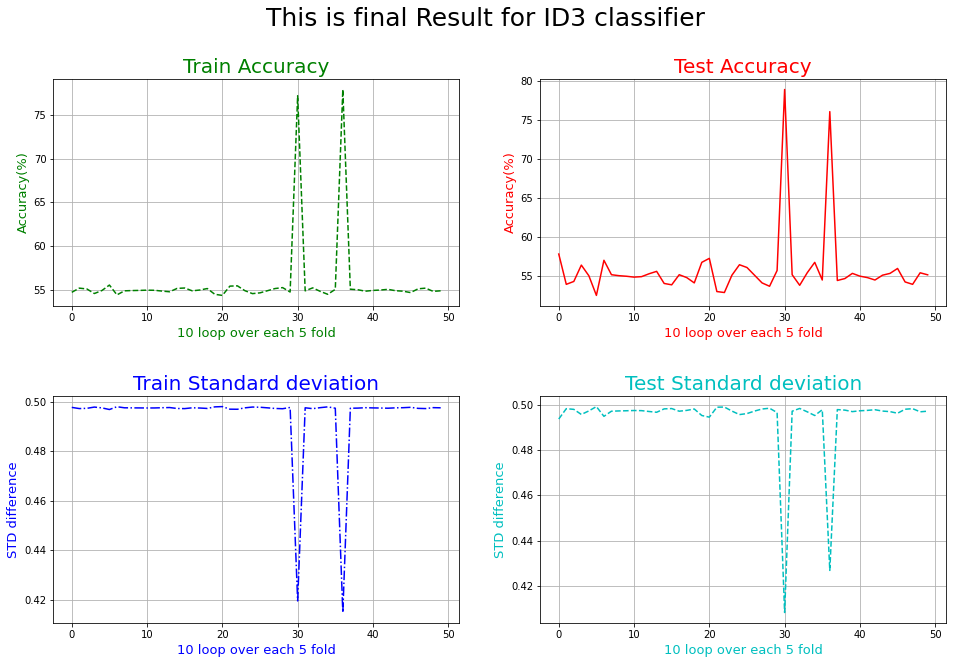

In [27]:
accTR_mushroom_ID3, accTST_mushroom_ID3, stdTR_mushroom_ID3, stdTST_mushroom_ID3  = Thor(X_mushroom, Y_mushroom, ID3)


--- 30.480804443359375 seconds to run Adaboost algorithm. ---


--- Average Accracy for Adaboost algorithm: 97.7820106268382. ---


--- Average Standard deviation for Adaboost algorithm: 0.146681686328244. ---




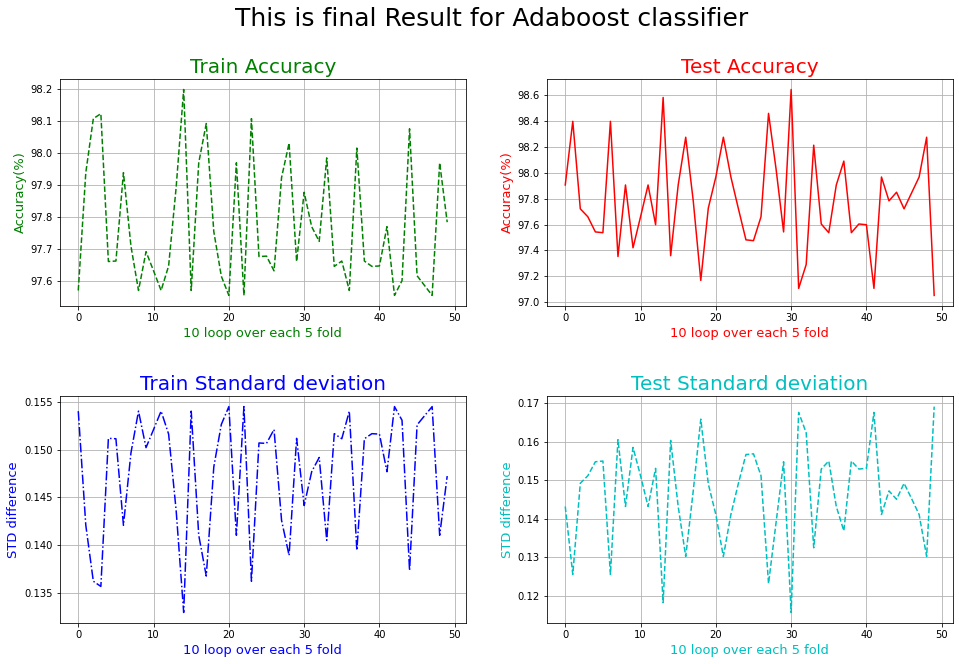

In [28]:
accTR_mushroom_Adaboost, accTST_mushroom_Adaboost, stdTR_mushroom_Adaboost, stdTST_mushroom_Adaboost  = Thor(X_mushroom, Y_mushroom, Adaboost)


--- 46.28377294540405 seconds to run MyRandomForest algorithm. ---


--- Average Accracy for MyRandomForest algorithm: 99.63200941649217. ---


--- Average Standard deviation for MyRandomForest algorithm: 0.055631153536772414. ---




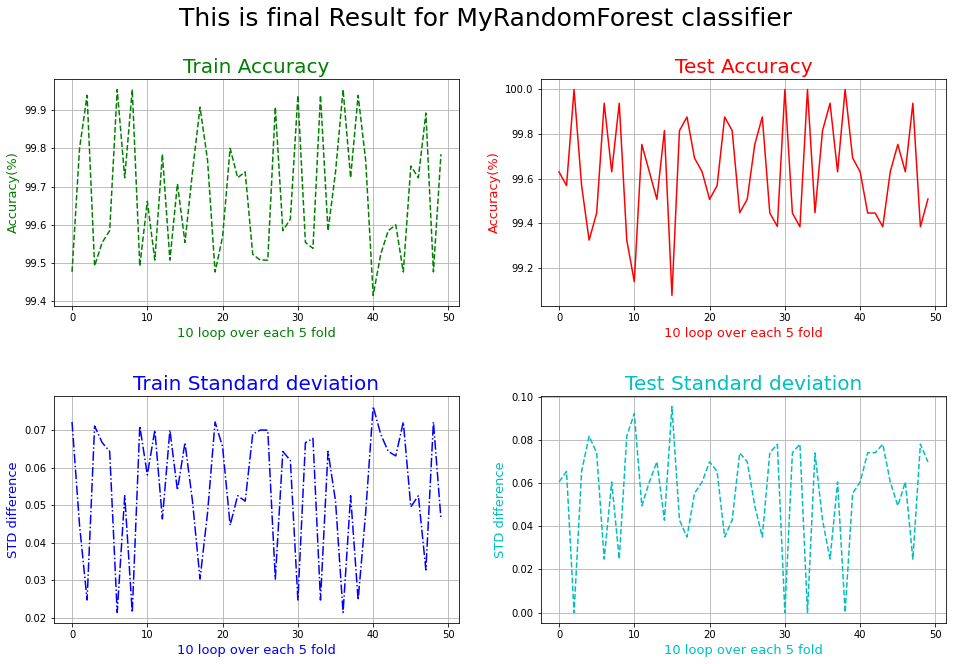

In [29]:
accTR_mushroom_RF, accTST_mushroom_RF, stdTR_mushroom_RF, stdTST_mushroom_RF  = Thor(X_mushroom, Y_mushroom, MyRandomForest)


--- 49.26301836967468 seconds to run NaiveBayes algorithm. ---


--- Average Accracy for NaiveBayes algorithm: 92.8850473850474. ---


--- Average Standard deviation for NaiveBayes algorithm: 0.2567345596780088. ---




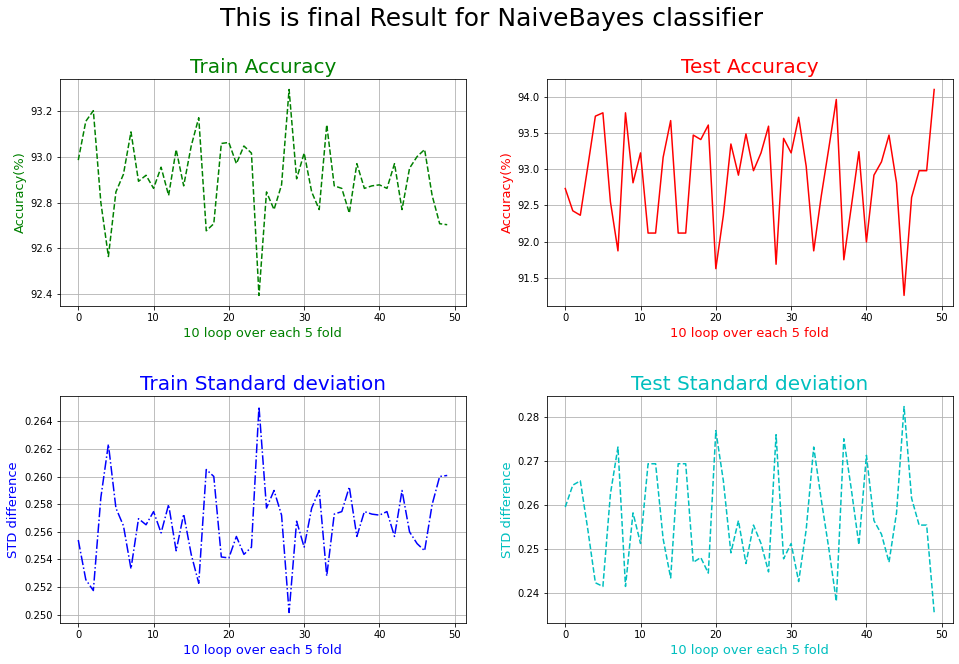

In [30]:
accTR_mushroom_NB, accTST_mushroom_NB, stdTR_mushroom_NB, stdTST_mushroom_NB  = Thor(X_mushroom, Y_mushroom, NaiveBayes)


--- 111.8832380771637 seconds to run KNeighborsClassifier algorithm. ---


--- Average Accracy for KNeighborsClassifier algorithm: 99.96923300371576. ---


--- Average Standard deviation for KNeighborsClassifier algorithm: 0.010073497297657132. ---




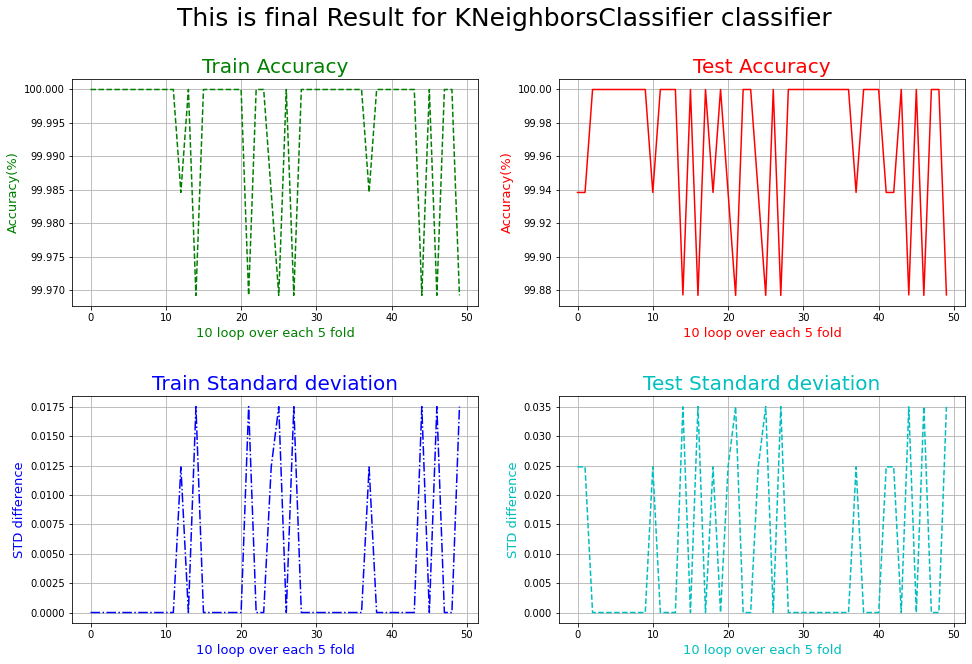

In [34]:
accTR_mushroom_KNN, accTST_mushroom_KNN, stdTR_mushroom_KNN, stdTST_mushroom_KNN  = Thor(X_mushroom, Y_mushroom, KNN)

# Algorithms performance on breast cancer dataset


--- 16.957639455795288 seconds to run ID3 algorithm. ---


--- Average Accracy for ID3 algorithm: 34.36225137537029. ---


--- Average Standard deviation for ID3 algorithm: 0.4512918241470403. ---




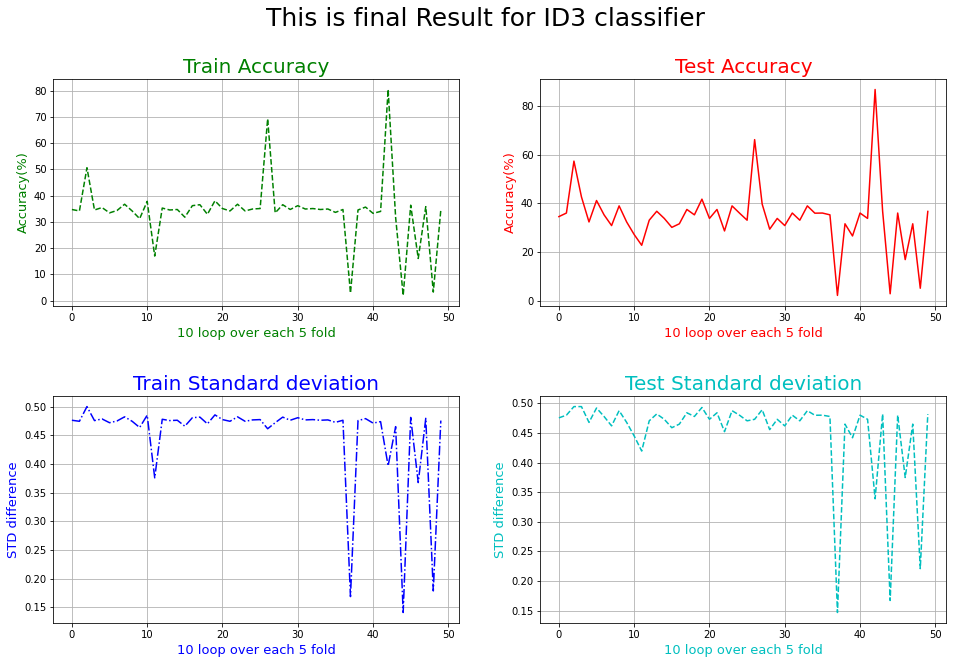

In [25]:
accTR_BC_ID3, accTST_BC_ID3, stdTR_BC_ID3, stdTST_BC_ID3 = Thor(X_Bcncr, Y_Bcncr, ID3)


--- 1.5777769088745117 seconds to run Adaboost algorithm. ---


--- Average Accracy for Adaboost algorithm: 92.77666102412188. ---


--- Average Standard deviation for Adaboost algorithm: 0.2544398115038193. ---




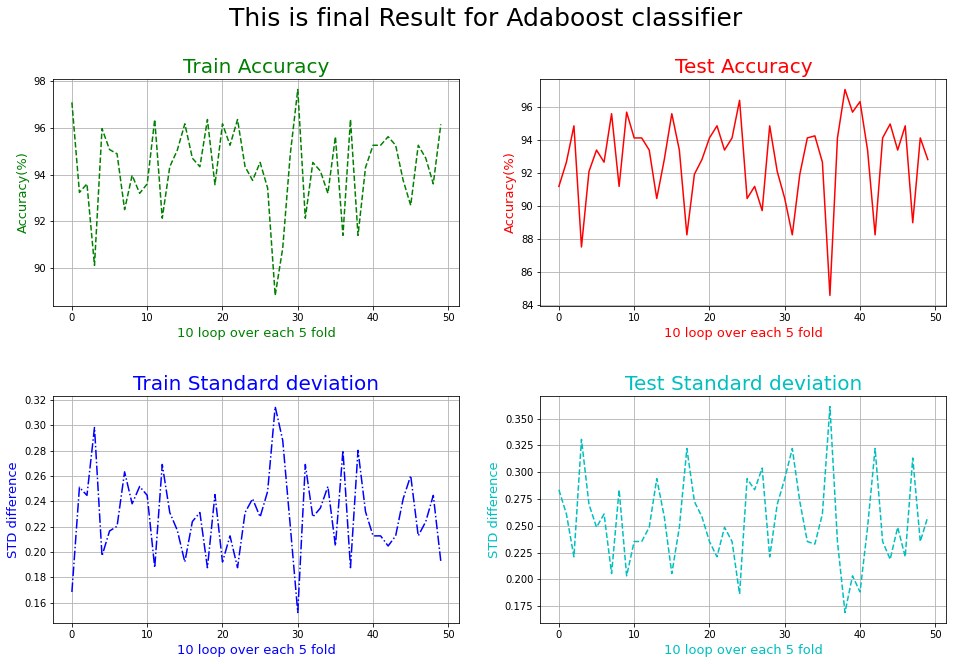

In [26]:
accTR_BC_Adaboost, accTST_BC_Adaboost, stdTR_BC_Adaboost, stdTST_BC_Adaboost = Thor(X_Bcncr, Y_Bcncr, Adaboost)


--- 1.9278416633605957 seconds to run MyRandomForest algorithm. ---


--- Average Accracy for MyRandomForest algorithm: 94.05734236140499. ---


--- Average Standard deviation for MyRandomForest algorithm: 0.2333284365900866. ---




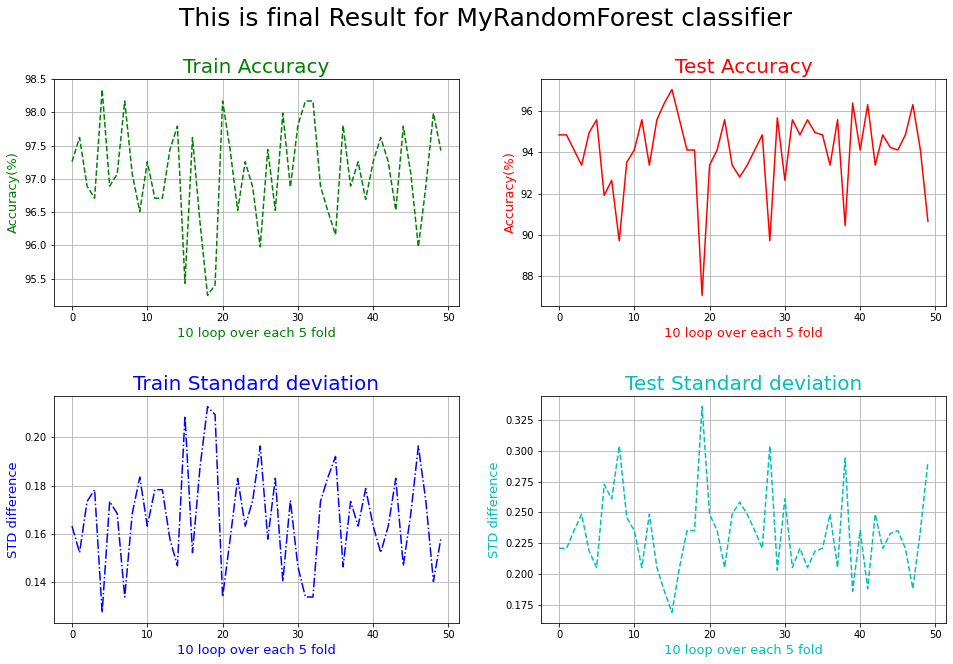

In [27]:
accTR_BC_RF, accTST_BC_RF, stdTR_BC_RF, stdTST_BC_RF = Thor(X_Bcncr, Y_Bcncr, MyRandomForest)

C:\Users\Milad\AppData\Local\Temp/ipykernel_12696/347540310.py:35: RuntimeWarning: divide by zero encountered in log
  posteriors.append(np.sum(np.log(mxl)) + np.log(self.nb_pri[indx]))



--- 1.8759806156158447 seconds to run NaiveBayes algorithm. ---


--- Average Accracy for NaiveBayes algorithm: 96.19360981802792. ---


--- Average Standard deviation for NaiveBayes algorithm: 0.187296772407589. ---




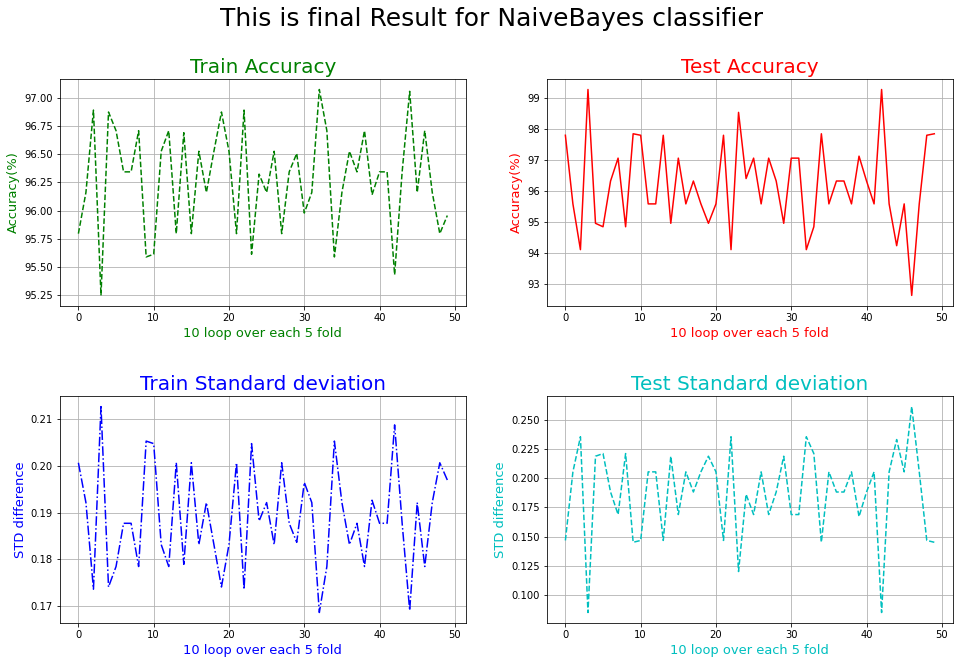

In [28]:
accTR_BC_NB, accTST_BC_NB, stdTR_BC_NB, stdTST_BC_NB = Thor(X_Bcncr, Y_Bcncr, NaiveBayes)


--- 464.559862613678 seconds to run KNN algorithm. ---


--- Average Accracy for KNN algorithm: 97.43916631400764. ---


--- Average Standard deviation for KNN algorithm: 0.15271106593201897. ---




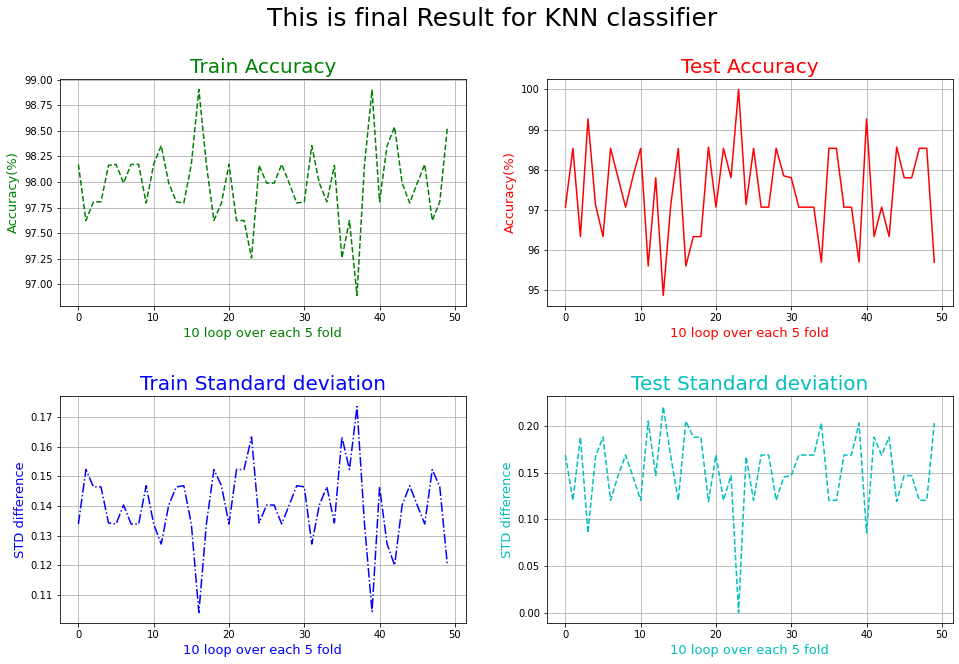

In [32]:
accTR_BC_KNN, accTST_BC_KNN, stdTR_BC_KNN, stdTST_BC_KNN = Thor(X_Bcncr, Y_Bcncr, KNN)

# Algorithms performance on Cars dataset


--- 9.918467044830322 seconds to run ID3 algorithm. ---


--- Average Accracy for ID3 algorithm: 18.672113943028485. ---


--- Average Standard deviation for ID3 algorithm: 0.3719460497791484. ---




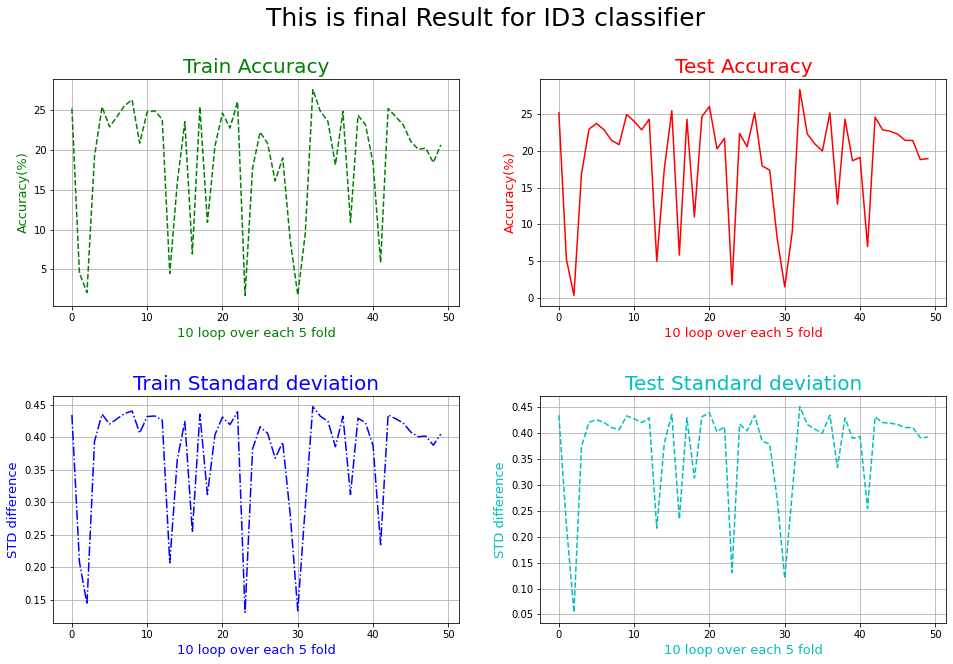

In [29]:
accTR_car_ID3, accTST_car_ID3, stdTR_car_ID3, stdTST_car_ID3 = Thor(X_cars, Y_cars, ID3)


--- 3.476701259613037 seconds to run Adaboost algorithm. ---


--- Average Accracy for Adaboost algorithm: 80.40419790104949. ---


--- Average Standard deviation for Adaboost algorithm: 0.3959222690500727. ---




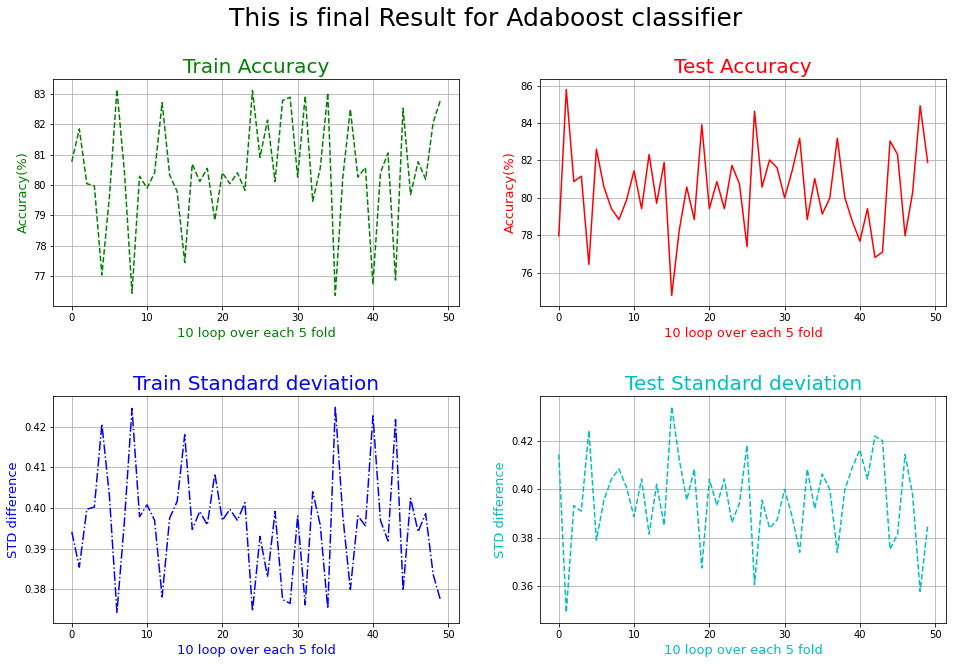

In [30]:
accTR_car_Adaboost, accTST_car_Adaboost, stdTR_car_Adaboost, stdTST_car_Adaboost = Thor(X_cars, Y_cars, Adaboost)


--- 4.11199951171875 seconds to run MyRandomForest algorithm. ---


--- Average Accracy for MyRandomForest algorithm: 86.60384807596202. ---


--- Average Standard deviation for MyRandomForest algorithm: 0.3398190079438857. ---




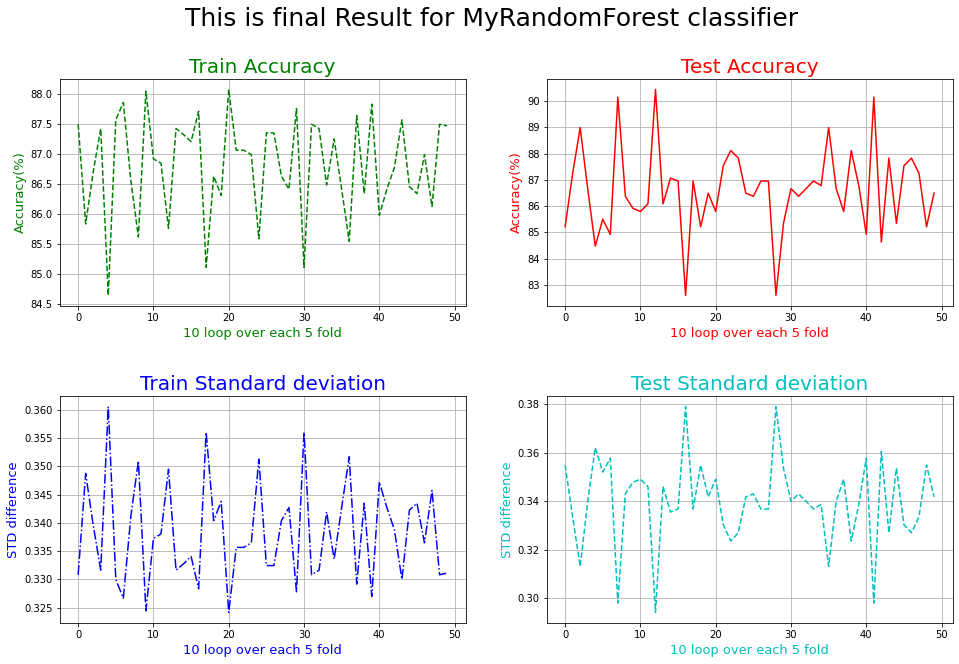

In [31]:
accTR_car_RF, accTST_car_RF, stdTR_car_RF, stdTST_car_RF = Thor(X_cars, Y_cars, MyRandomForest)


--- 9.789810180664062 seconds to run NaiveBayes algorithm. ---


--- Average Accracy for NaiveBayes algorithm: 80.63618190904548. ---


--- Average Standard deviation for NaiveBayes algorithm: 0.39444849173647545. ---




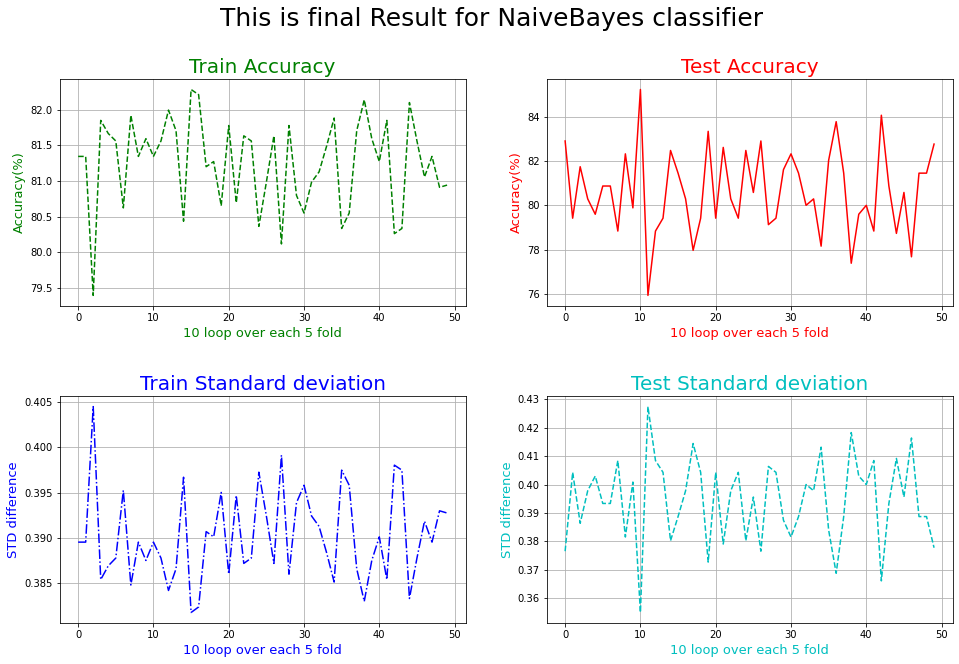

In [32]:
accTR_car_NB, accTST_car_NB, stdTR_car_NB, stdTST_car_NB = Thor(X_cars, Y_cars, NaiveBayes)


--- 4392.5775644779205 seconds to run KNN algorithm. ---


--- Average Accracy for KNN algorithm: 94.65307346326837. ---


--- Average Standard deviation for KNN algorithm: 0.2238724247761463. ---




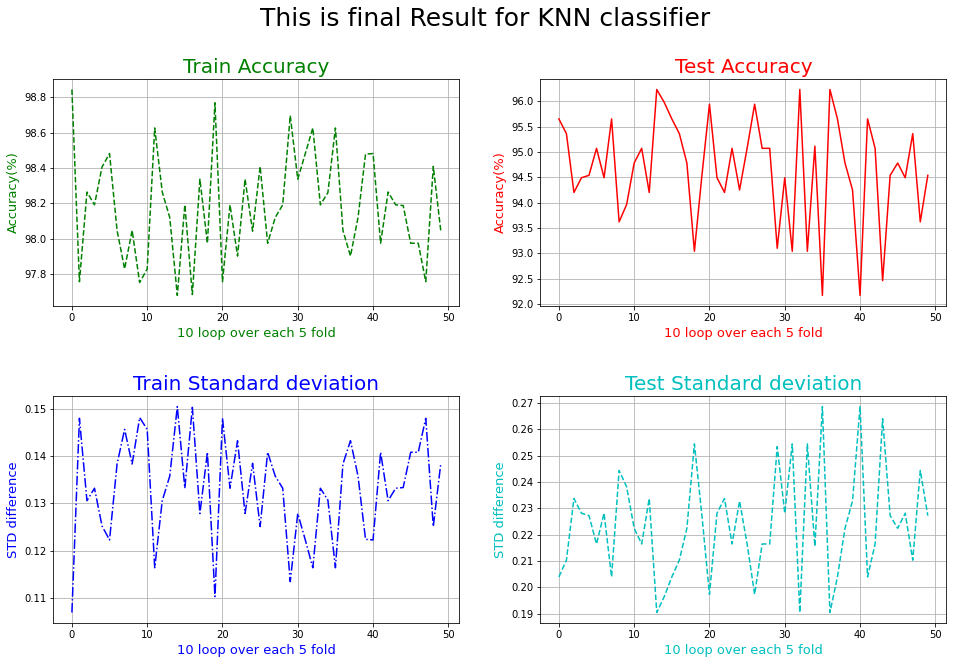

In [31]:
accTR_car_KNN, accTST_car_KNN, stdTR_car_KNN, stdTST_car_KNN = Thor(X_cars, Y_cars, KNN)

# Algorithms performance on ecoli dataset


--- 87.04604649543762 seconds to run ID3 algorithm. ---


--- Average Accracy for ID3 algorithm: 21.72958735733099. ---


--- Average Standard deviation for ID3 algorithm: 0.3046401723643125. ---




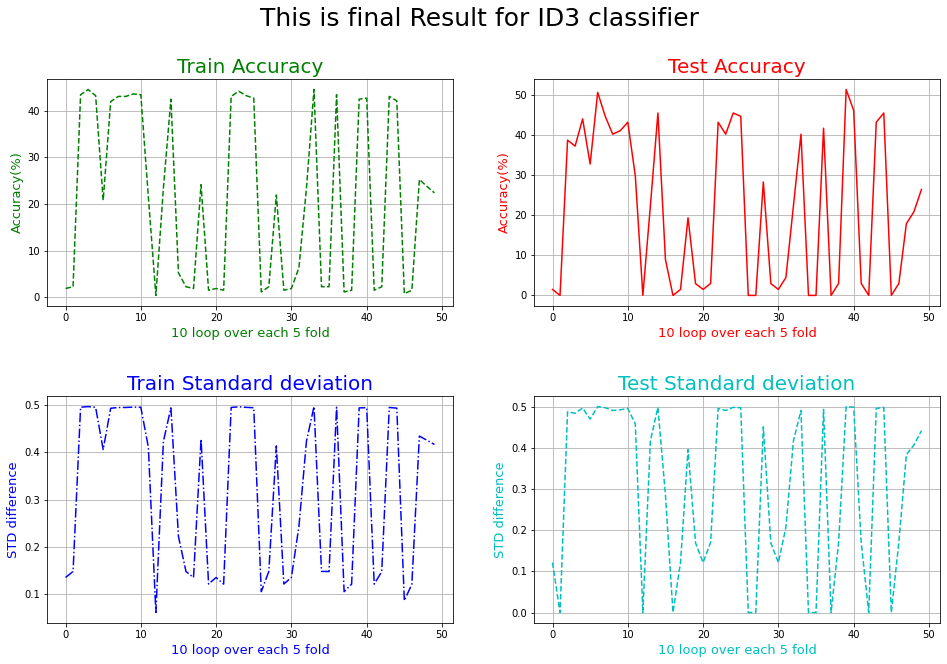

In [33]:
accTR_ecoli_ID3, accTST_ecoli_ID3, stdTR_ecoli_ID3, stdTST_ecoli_ID3 = Thor(X_ec, Y_ec, ID3)


--- 0.867668628692627 seconds to run Adaboost algorithm. ---


--- Average Accracy for Adaboost algorithm: 73.36786654960493. ---


--- Average Standard deviation for Adaboost algorithm: 0.43487649321418453. ---




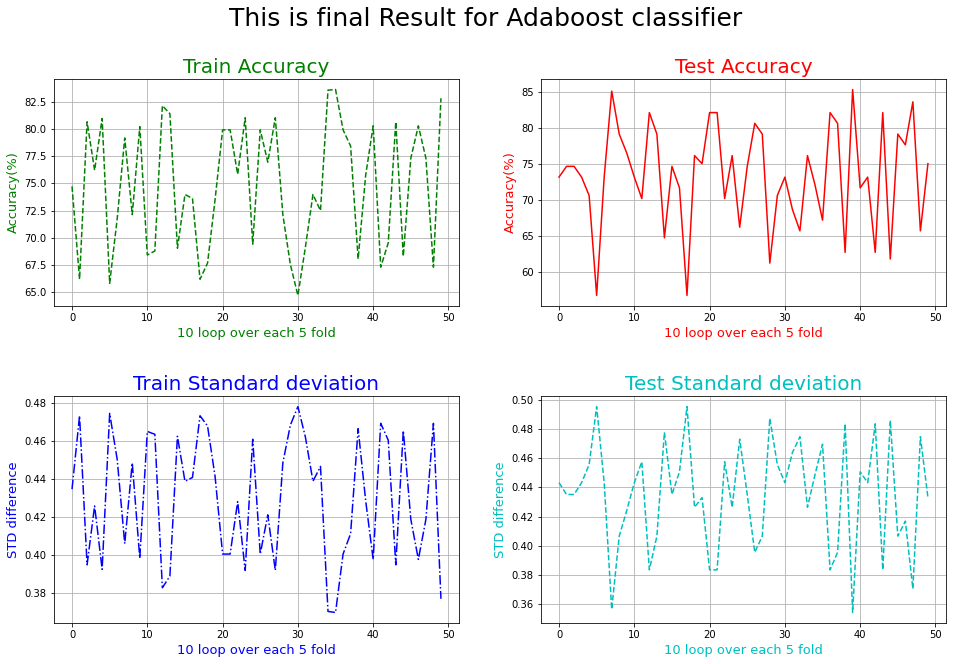

In [26]:
accTR_ecoli_Adaboost, accTST_ecoli_Adaboost, stdTR_ecoli_Adaboost, stdTST_ecoli_Adaboost = Thor(X_ec, Y_ec, Adaboost)


--- 1.387289047241211 seconds to run MyRandomForest algorithm. ---


--- Average Accracy for MyRandomForest algorithm: 79.20324846356453. ---


--- Average Standard deviation for MyRandomForest algorithm: 0.4014331473136286. ---




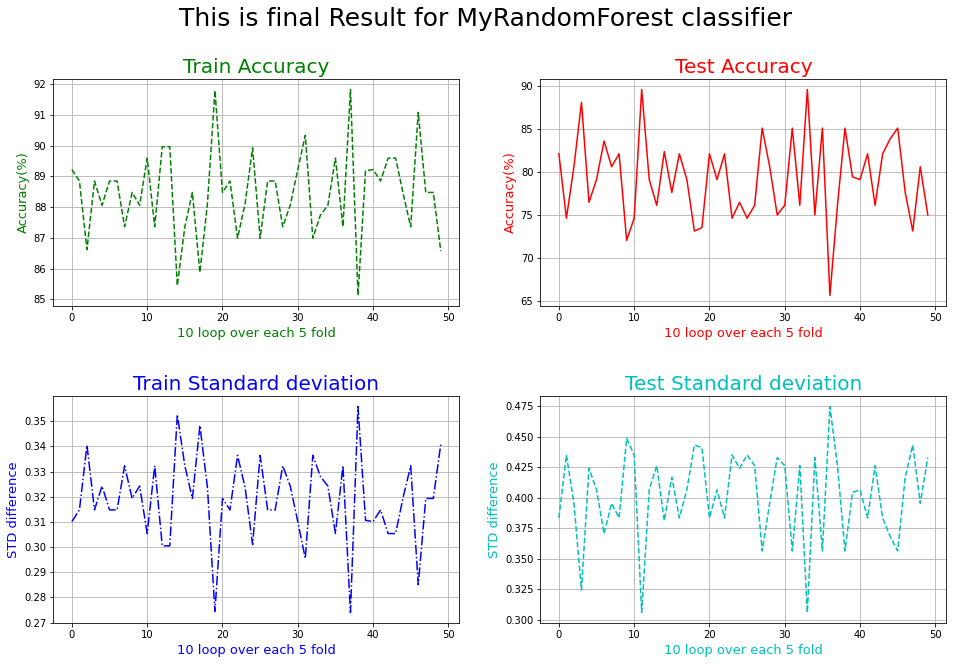

In [35]:
accTR_ecoli_RF, accTST_ecoli_RF, stdTR_ecoli_RF, stdTST_ecoli_RF = Thor(X_ec, Y_ec, MyRandomForest)

C:\Users\Milad\AppData\Local\Temp/ipykernel_12696/347540310.py:35: RuntimeWarning: divide by zero encountered in log
  posteriors.append(np.sum(np.log(mxl)) + np.log(self.nb_pri[indx]))



--- 3.176502227783203 seconds to run NaiveBayes algorithm. ---


--- Average Accracy for NaiveBayes algorithm: 83.71290605794555. ---


--- Average Standard deviation for NaiveBayes algorithm: 0.36402739724566074. ---




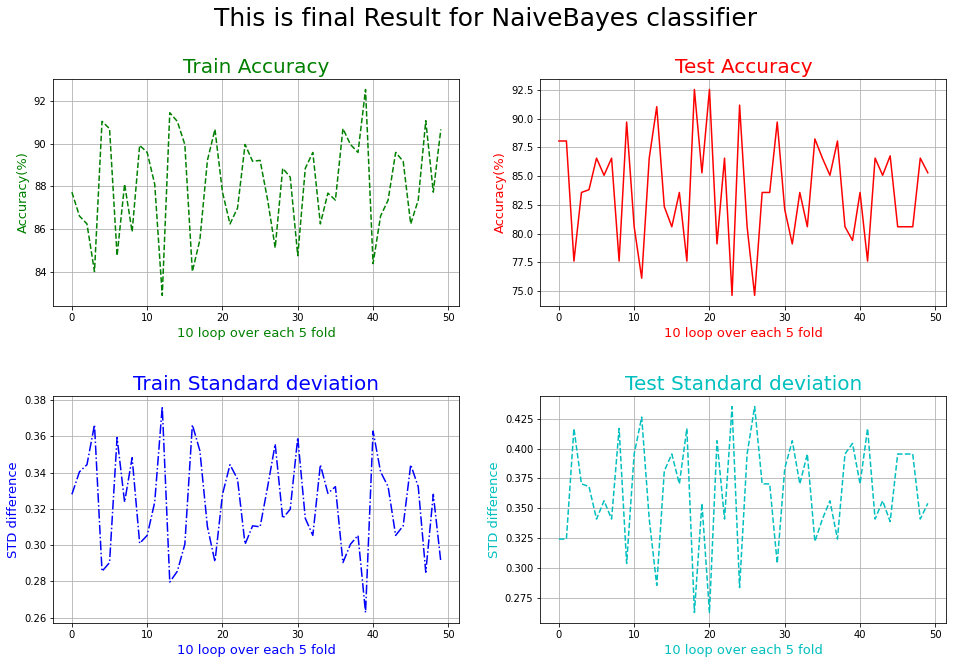

In [36]:
accTR_ecoli_NB, accTST_ecoli_NB, stdTR_ecoli_NB, stdTST_ecoli_NB = Thor(X_ec, Y_ec, NaiveBayes)


--- 81.24965739250183 seconds to run KNN algorithm. ---


--- Average Accracy for KNN algorithm: 85.44556628621596. ---


--- Average Standard deviation for KNN algorithm: 0.34779806387183876. ---




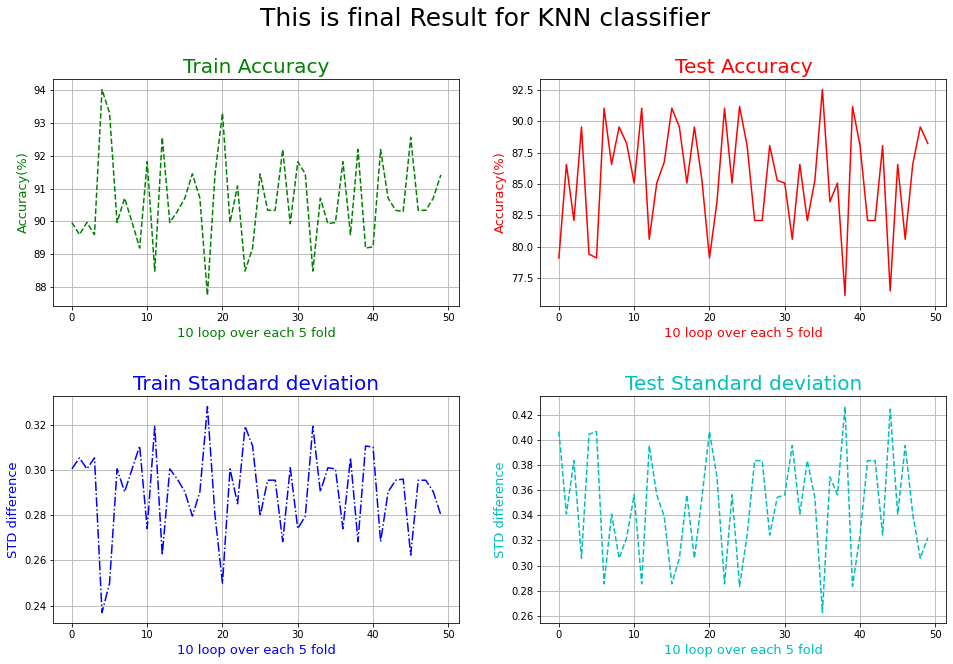

In [36]:
accTR_ecoli_KNN, accTST_ecoli_KNN, stdTR_ecoli_KNN, stdTST_ecoli_KNN = Thor(X_ec, Y_ec, KNN)

# Algorithms performance on letter recognition dataset


--- 3215.0290536880493 seconds to run ID3 algorithm. ---


--- Average Accracy for ID3 algorithm: 0.9594999999999999. ---


--- Average Standard deviation for ID3 algorithm: 0.05174039024212759. ---




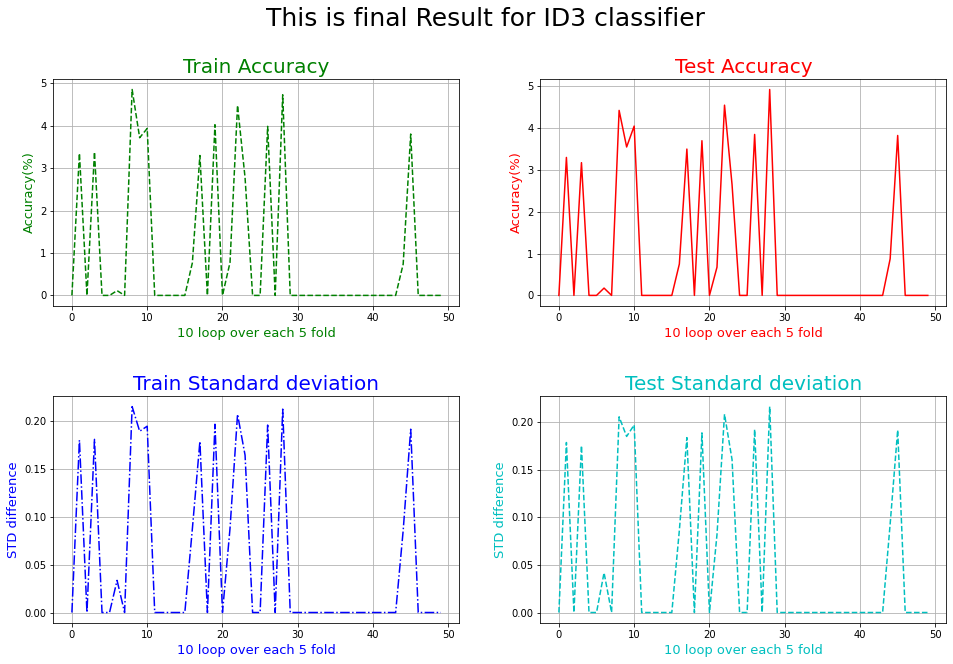

In [30]:
accTR_LtR_ID3, accTST_LtR_ID3, stdTR_LtR_ID3, stdTST_LtR_ID3 = Thor(X_letter, Y_letter, ID3)


--- 40.18063235282898 seconds to run Adaboost algorithm. ---


--- Average Accracy for Adaboost algorithm: 9.351999999999999. ---


--- Average Standard deviation for Adaboost algorithm: 0.2901069277152592. ---




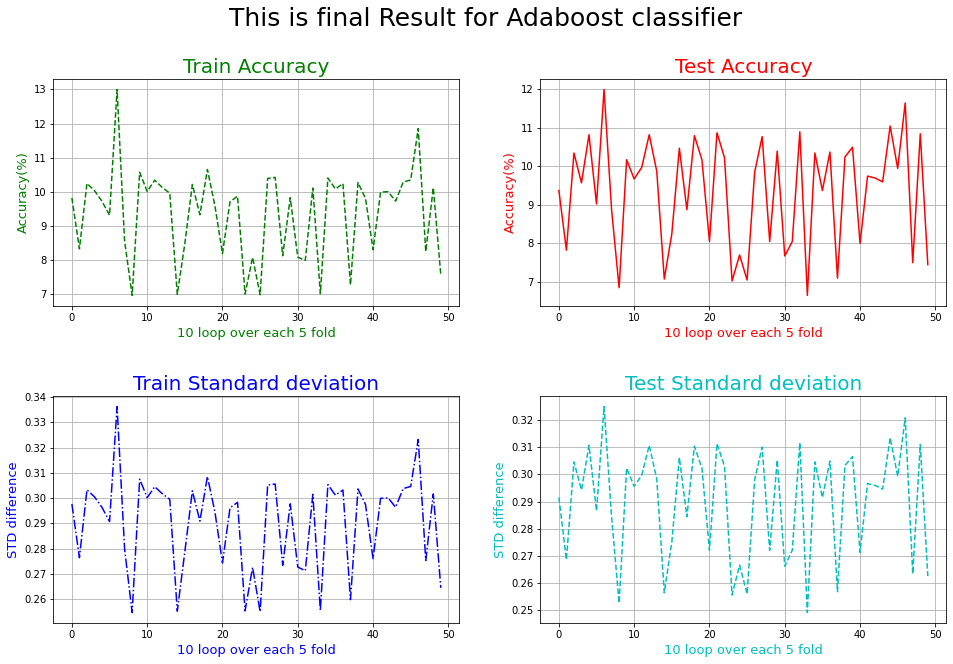

In [27]:
accTR_LtR_Adaboost, accTST_LtR_Adaboost, stdTR_LtR_Adaboost, stdTST_LtR_Adaboost = Thor(X_letter, Y_letter, Adaboost)


--- 71.4788510799408 seconds to run MyRandomForest algorithm. ---


--- Average Accracy for MyRandomForest algorithm: 35.82. ---


--- Average Standard deviation for MyRandomForest algorithm: 0.4786720572063617. ---




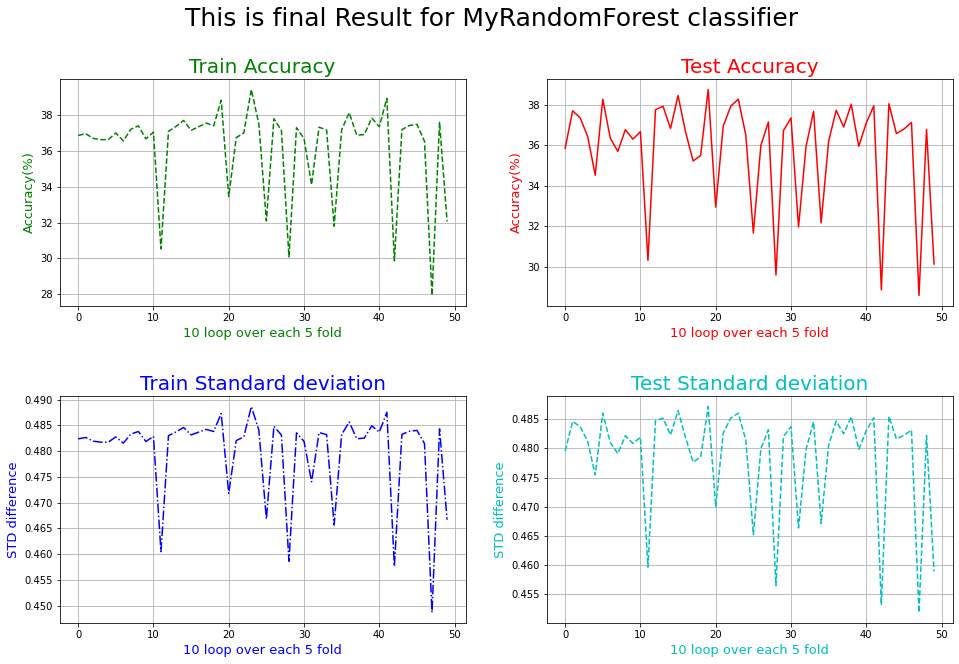

In [28]:
accTR_LtR_RF, accTST_LtR_RF, stdTR_LtR_RF, stdTST_LtR_RF = Thor(X_letter, Y_letter, MyRandomForest)


--- 549.1421394348145 seconds to run NaiveBayes algorithm. ---


--- Average Accracy for NaiveBayes algorithm: 64.306. ---


--- Average Standard deviation for NaiveBayes algorithm: 0.479030509464337. ---




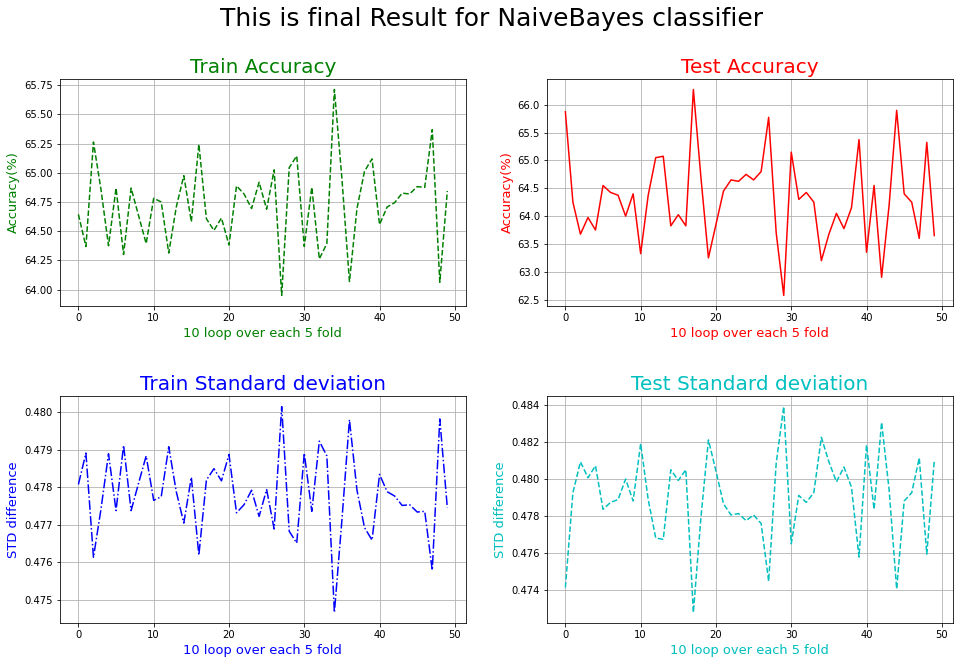

In [29]:
accTR_LtR_NB, accTST_LtR_NB, stdTR_LtR_NB, stdTST_LtR_NB = Thor(X_letter, Y_letter, NaiveBayes)


--- 561.201042175293 seconds to run KNeighborsClassifier algorithm. ---


--- Average Accracy for KNeighborsClassifier algorithm: 95.14049999999999. ---


--- Average Standard deviation for KNeighborsClassifier algorithm: 0.2148583656362545. ---




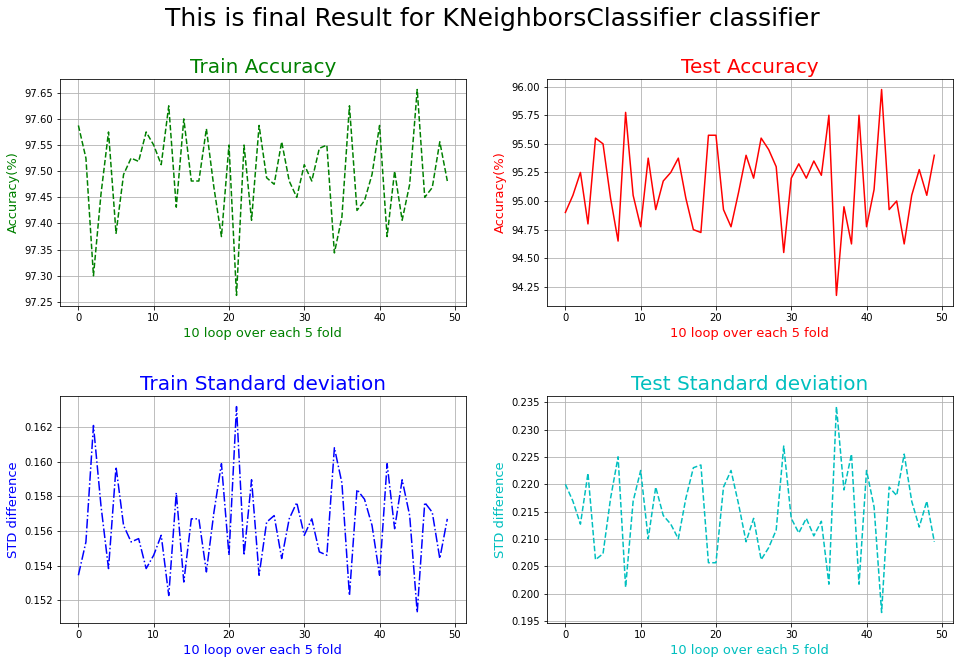

In [37]:
accTR_LtR_KNN, accTST_LtR_KNN, stdTR_LtR_KNN, stdTST_LtR_KNN = Thor(X_letter, Y_letter, KNN)